# Techonologie sieciowe sprawozdanie nr 2
#### - Paweł Wilkosz

Zadania dotyczą badania modelów sieci przedstawionych za pomocą grafów.
W tym celu skorzystamy z języka Python i bibliotek `networkx` i `pyplot`.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from functools import reduce
%matplotlib inline
random.seed()

## Szacowanie niezawodności

Do tego celu posłuży nam metoda Monte Carlo.
Nasz algorytm odbywa się w następujących krokach:
1. Dla każdej krawędzi losujemy liczbę z zakresu \[0,1\], jeśli jest większa od niezawodności danej krawędzi, usuwamy krawędź 
2. Jeśli graf pozostał spójny, zwiększamy licznik pozytywnych iteracji.
3. Powtarzamy poprzednie punkty.

Niezawodnością sieci jest liczba pozytywnych iteracji podzielona przez liczbę wszystkich iteracji.


In [2]:
def monte_carlo(start_graph, repetitions=1000):
    positive = 0
    for rep in range(repetitions):
        graph = start_graph.copy()
        
        for edge in list(graph.edges()):
            if random.random() > graph[edge[0]][edge[1]]['rel']:
                graph.remove_edge(edge[0], edge[1])
        
        if nx.is_connected(graph):
            positive += 1
    
    return positive / repetitions

### Model sieci

Nasze badania rozpoczynamy od grafu liniowego o 20 wierzchołkach.

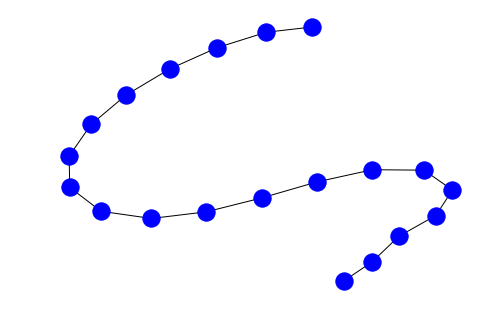

In [3]:
path = nx.path_graph(20)
nx.draw(path, node_color='b')

Definiujemy funkcję niezawodności, przyporządkowując każdej krawędzi parametr niezawodności wynoszący `0.95`

In [4]:
nx.set_edge_attributes(path, 0.95, 'rel')

Obliczamy niezawodność powyższego modelu.

In [5]:
monte_carlo(path)

0.381

Modyfikujemy poprzedni graf tak aby powstał z niego graf cykliczny.

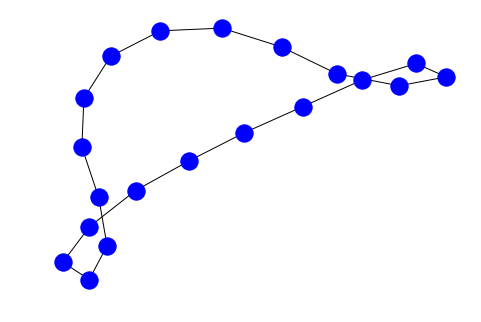

In [6]:
cyclical = path.copy()
cyclical.add_edge(0,19, rel=0.95)
nx.draw(cyclical, node_color='b')

Niezawodność takiego modelu wynosi:

In [7]:
monte_carlo(cyclical)

0.706

Jak widać, dodanie jednej krawędzi znacznie zwiększyło niezawodność sieci.

Następnie, dodajemy do naszego grafu dwie kolejne krawędzie

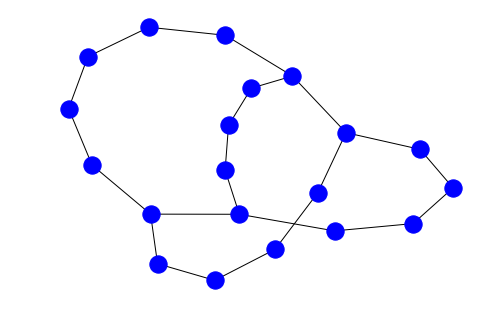

In [8]:
modified = cyclical.copy()
modified.add_edge(0,9, rel=0.8)
modified.add_edge(4,14, rel=0.7)
nx.draw(modified, node_color='b')

Obliczamy niezawodność tak powstałej struktury

In [9]:
monte_carlo(modified)

0.877

Ponownie osiągnęliśmy poprawę względem poprzedniego grafu

Następnie zbadamy wpływ dodania 4 krawędzi dodanych losowo albo intuicyjnie.

#### Losowo

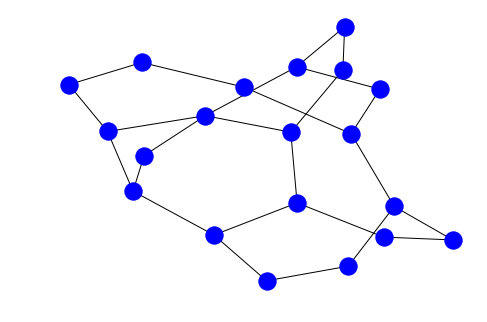

In [10]:
rand_graph = modified.copy()

for i in range(4):
    rand_graph.add_edge(random.randint(0,19), random.randint(0,19), rel=0.4)
    
nx.draw(rand_graph, node_color='b')

In [11]:
monte_carlo(rand_graph)

0.828

#### Intuicyjnie
Najbardziej rozsądnym wyborem wydaje się połączenie najbardziej oddalonych wierzchołków. W takim wypadku krawędzie powinny łączyć punkty na grafie cyklicznym oddalone od siebie o 10 wierzchołków.

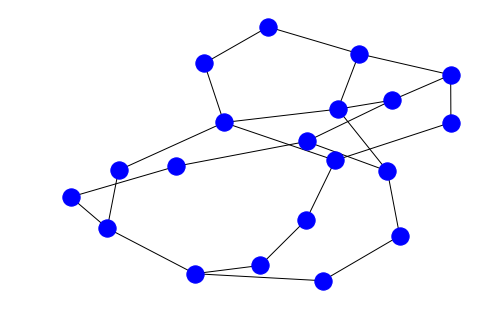

In [12]:
intuitive_graph = modified.copy()
intuitive_graph.add_edge(2, 12, rel=0.4)
intuitive_graph.add_edge(7, 17, rel=0.4)
intuitive_graph.add_edge(3, 13, rel=0.4)
intuitive_graph.add_edge(9, 13, rel=0.4)

nx.draw(intuitive_graph, node_color='b')

In [13]:
monte_carlo(intuitive_graph)

0.924

Dodanie czterech krawędzi w obu przypadkach znacznie poprawiło niezawodność sieci. Mozemy zatem wywnioskować, że pewne połączenia sieci warto umieścić losowo.

Przetestujmy w ten sam sposób graf Petersena.

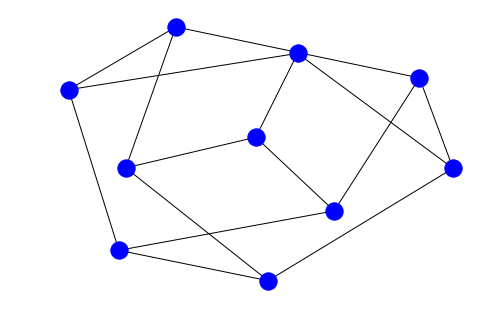

In [14]:
petersen = nx.petersen_graph()
nx.set_edge_attributes(petersen, 0.95, 'rel')
nx.draw(petersen, node_color='b')

In [15]:
monte_carlo(petersen, 10000)

0.9985

Jest to przykład grafu regularnego co sprawia, że 
tak zamodelowana sieć komputerowa jest bardzo trudna do rozspójnienia.

## Badanie natężeń

### Możliwe topologie grafu

#### Graf cykliczny

10

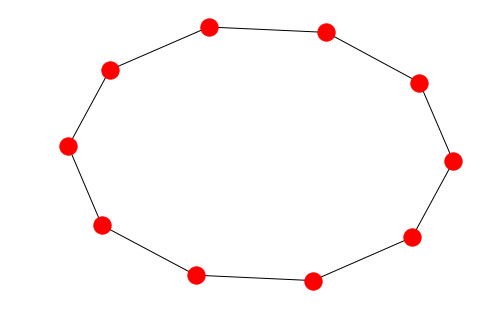

In [16]:
cycle = nx.cycle_graph(10)
nx.draw(cycle)
len(cycle.edges())

####  Graf kołowy
Do grafu cyklicznego dodajemy jeden wierchołek, który łączymy ze  wszystkimi pozostałymi wierzchołkami.

20

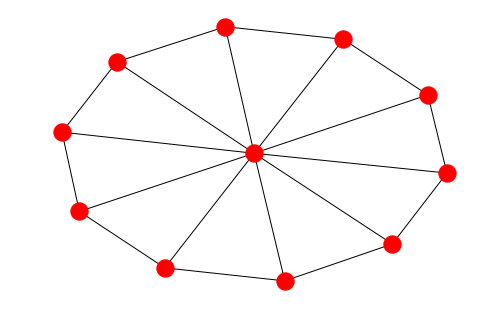

In [17]:
circle = cycle.copy()
circle.add_node(10)
for n in list(circle.nodes())[:10]:
    circle.add_edge(n,10)
nx.draw(circle)
len(circle.edges())

#### Graf Petersena

15

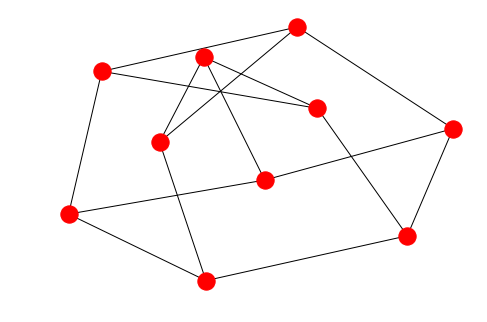

In [18]:
petersen = nx.petersen_graph()
nx.draw(petersen)
len(petersen.edges())

### Macierz natężeń

Definiujemy macierz $N$, w której element $n_{i,j}$ jest równy ilości pakietów przesyłanych  pomiędzy wierzchołkami $i$ oraz  $j$

In [19]:
matrix = []

for i in range(10):
    matrix.append([])
    for j in range(10):
        if i==j:
            matrix[i].append(0)
        else:
            matrix[i].append(random.randint(1,9))
            
matrix

[[0, 1, 8, 3, 6, 8, 2, 4, 9, 7],
 [5, 0, 4, 4, 2, 1, 5, 2, 9, 8],
 [8, 9, 0, 3, 6, 9, 9, 4, 1, 6],
 [3, 6, 4, 0, 9, 4, 1, 7, 3, 1],
 [5, 3, 4, 9, 0, 1, 7, 6, 4, 6],
 [1, 5, 7, 1, 3, 0, 5, 5, 1, 3],
 [9, 6, 4, 5, 3, 6, 0, 7, 2, 3],
 [9, 6, 4, 7, 8, 4, 8, 0, 5, 1],
 [2, 9, 3, 5, 5, 1, 2, 1, 0, 3],
 [6, 9, 6, 2, 1, 4, 1, 8, 8, 0]]

###  Przebieg doświadczenia

Ustawiamy każdej krawędzi niezawodność i przepustowość.

In [20]:
for graph in cycle, circle, petersen:
    for edge in graph.edges():
        graph[edge[0]][edge[1]]['rel'] = 0.95
        graph[edge[0]][edge[1]]['cap'] = 100
        graph[edge[0]][edge[1]]['a'] = 0

Właściwy test polega na wykonaniu 1000 iteracji składających się z kilku kroków. Najpierw  sprawdzamy czy sieć nie uległa rozspójnieniu(jak w zadaniu pierwszym), następnie każdej pozostałej krawędzi pryzporządkowujemy całkowitą liczbę pakietów przechodzących przez nią. Następnie sprawdzamy czy liczba pakietów przechodząca przez krawędź jest mniejsza od jej  przepustowości ($a(e)<c(e)$). Jeżeli nierówność jest spełniona, liczymy opóźnienie ze wzoru:
$$
T = \frac{1}{G} \sum_e \frac{a(e)}{c(e)-a(e)}
$$
gdzie $G$ to suma elementów krawędzi natężeń.

In [21]:
def apply_matrix(graph, matrix):
    nx.set_edge_attributes(graph, 0, 'a')
    for i, row in enumerate(matrix):
        for j, n in enumerate(row):
            path = nx.shortest_path(graph, i, j)
            for k in range(len(path)-1):
                graph[path[k]][path[k+1]]['a'] += n
            

In [22]:
def delay(graph, matrix):
    apply_matrix(graph, matrix)
    G = sum(reduce(lambda x,y: x+y, matrix))
    return 1/G * sum([graph[es][ee]['a']/(graph[es][ee]['cap'] - graph[es][ee]['a'])  if graph[es][ee]['cap'] > graph[es][ee]['a'] else -1 for es, ee in graph.edges()])

In [23]:
for name, graph in ("Graf cykliczny",cycle), ("Graf kołowy", circle), ("Graf Petersena", petersen):
    avg_delay = delay(graph, matrix)
    if avg_delay < 0:
        print(name, "nie przeszedł próby")
    else:
        print(name,"uzyskał opóźnienie:", avg_delay)

Graf cykliczny nie przeszedł próby
Graf kołowy uzyskał opóźnienie: 0.030371274355286294
Graf Petersena uzyskał opóźnienie: 0.03639903544431434


### Miara niezawodności
Jako nową miarę niezawodności przyjmujemy prawdopodobieństwo że średnie opóźnienie nierozspójnionej sieci będzie mniejsze od $T_{max}$.

In [24]:
def delay_reliability(start_graph, matrix, tmax, p, intervals=10, repetitions=1000):
    nx.set_edge_attributes(start_graph, p, 'rel')
    positive = 0
    for _ in range(repetitions):
        graph = start_graph.copy()
        
        for _ in range(intervals):
            for edge in list(graph.edges()):
                if random.random() > graph[edge[0]][edge[1]]['rel']:
                    graph.remove_edge(*edge)

            if not nx.is_connected(graph):
                break

            d = delay(graph, matrix)
            if d > 0 and d < tmax:
                positive += 1
          
    return positive/(repetitions*intervals)

Przykładowe wywołania dla grafu Petersena:

In [25]:
delay_reliability(petersen, matrix, 0.05, 0.98)

0.4171

In [26]:
delay_reliability(petersen, matrix, 0.04, 0.98)

0.3228

In [27]:
delay_reliability(petersen, matrix, 0.03, 0.98)

0.0163

In [28]:
delay_reliability(petersen, matrix, 0.05, 0.9)

0.101

In [29]:
delay_reliability(petersen, matrix, 0.1, 0.98)

0.7736

## Wnioski
1. Najistotniejszymi parametrami sieci komputerowej, poza jej topologią, jest przepustowość jednego połączenia oraz jego trwałość. Nie można jednoznacznie wybrać ważniejszego parametru. Duży wpływ na konstrukcje sieci ma to, jakie opóźnienia są w stanie zaakceptować użytkownicy.
2. Najlepszą topologię sieci  komputerowej stanowia grafy regularne i k-spójne, o możliwie dużym k. Dobrym przykładem takiego grafu jest graf Petersena.